In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
red['type'] = 'red'
white['type'] = 'white'
df = pd.concat([red, white], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


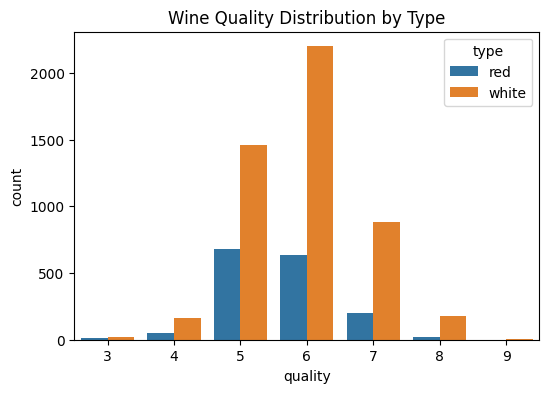

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='quality', hue='type')
plt.title('Wine Quality Distribution by Type')
plt.show()

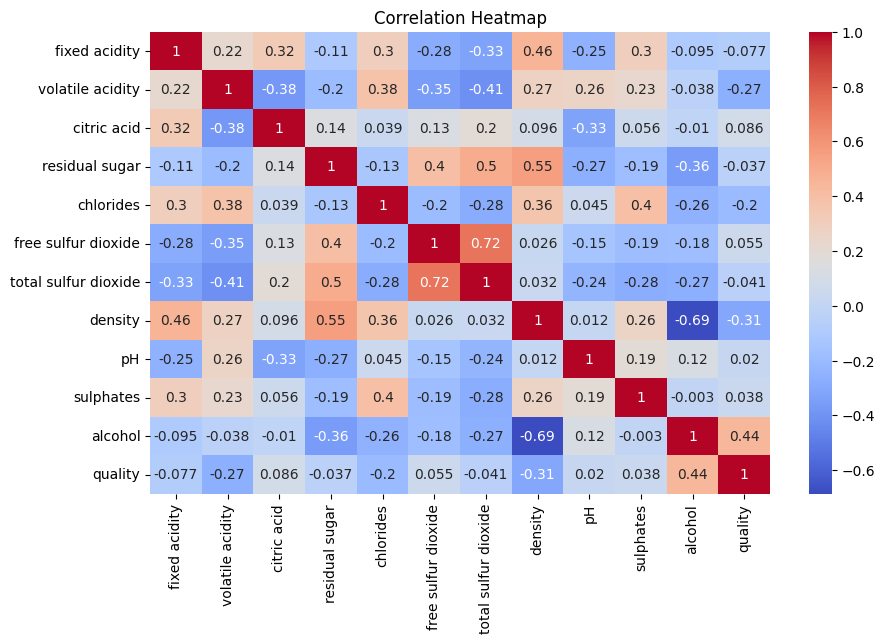

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
df['type'] = LabelEncoder().fit_transform(df['type'])
X = df.drop('quality', axis=1)
y = df['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression R²: 0.30586891921679615
Linear Regression RMSE: 0.7279784688024568


C:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print('SGDRegressor R²:', r2_score(y_test, y_pred_sgd))
print('SGDRegressor RMSE:', mean_squared_error(y_test, y_pred_sgd, squared=False))

SGDRegressor R²: 0.3040391214303352
SGDRegressor RMSE: 0.7289373487077673


C:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest R²:', r2_score(y_test, y_pred_rf))
print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest R²: 0.509509957179671
Random Forest RMSE: 0.6119456989484757


C:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


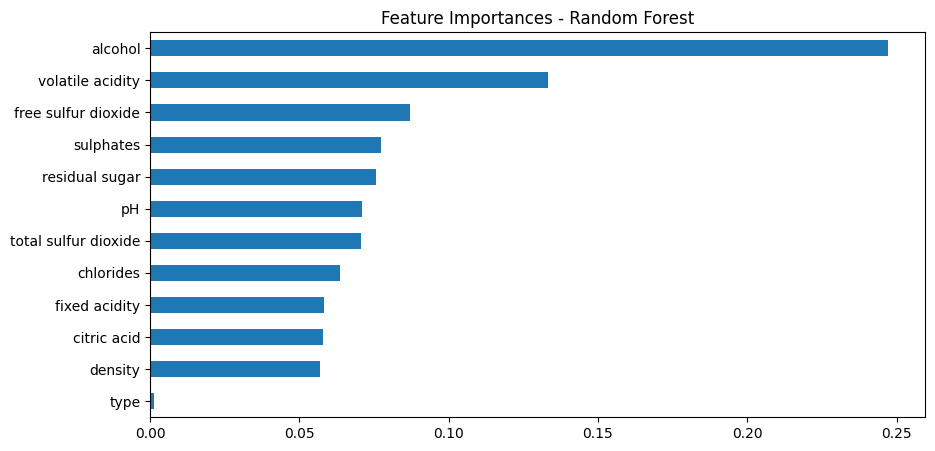

In [13]:
plt.figure(figsize=(10,5))
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title('Feature Importances - Random Forest')
plt.show()